## About

This plot is a [scatter plot](/scatter-plot) showing the relationship between the footprint and the biocapacity of different countries.

It was made by [Joseph Barbier](https://www.barbierjoseph.com/). Thanks to him for accepting sharing his work here!

Let's see what the final picture will look like:

![scatter plot with annotations](https://github.com/holtzy/The-Python-Graph-Gallery/blob/master/static/graph/web-scatter-with-customized-annotations.png?raw=true)


## Libraries

First, we need to install the following librairies:


In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from highlight_text import fig_text
from adjustText import adjust_text
from matplotlib.font_manager import FontProperties


## Dataset

For this reproduction, we're going to retrieve the data directly from the [gallery's Github repo](https://github.com/holtzy/The-Python-Graph-Gallery). This means we just need to **give the right url as an argument** to pandas' `read_csv()` function to retrieve the data.


In [2]:
url = 'https://raw.githubusercontent.com/holtzy/the-python-graph-gallery/master/static/data/footprint.csv'
df = pd.read_csv(url)
df = df[df['biocapacity']< 60]
df.head()

,lifexp,country,region,gdpCapita,populationMillions,footprint,biocapacity,ecoReserve,earthsRequired,ratio
0,76.0,Albania,Other Europe,14889.0,2.9,2.1,1.176752,-0.894486,1.371485,1.784573
1,62.0,Angola,Africa,6304.0,35.0,0.9,1.588191,0.730346,0.568029,0.566682
2,75.0,Argentina,South America,22117.0,46.0,3.2,5.231663,2.011045,2.132556,0.611660
3,83.0,Australia,Asia-Pacific,53053.0,26.1,5.8,11.021401,5.244362,3.825307,0.526249
4,81.0,Austria,EU-27,55460.0,9.1,5.6,2.893775,-2.732866,3.725721,1.935189


## Basic scatter plot

The core of the chart is simply based on the `scatter()` funtion from [matplotlib](/matplotlib). You can learn more about it in the [dedicated section](/scatter-plot) of the gallery.


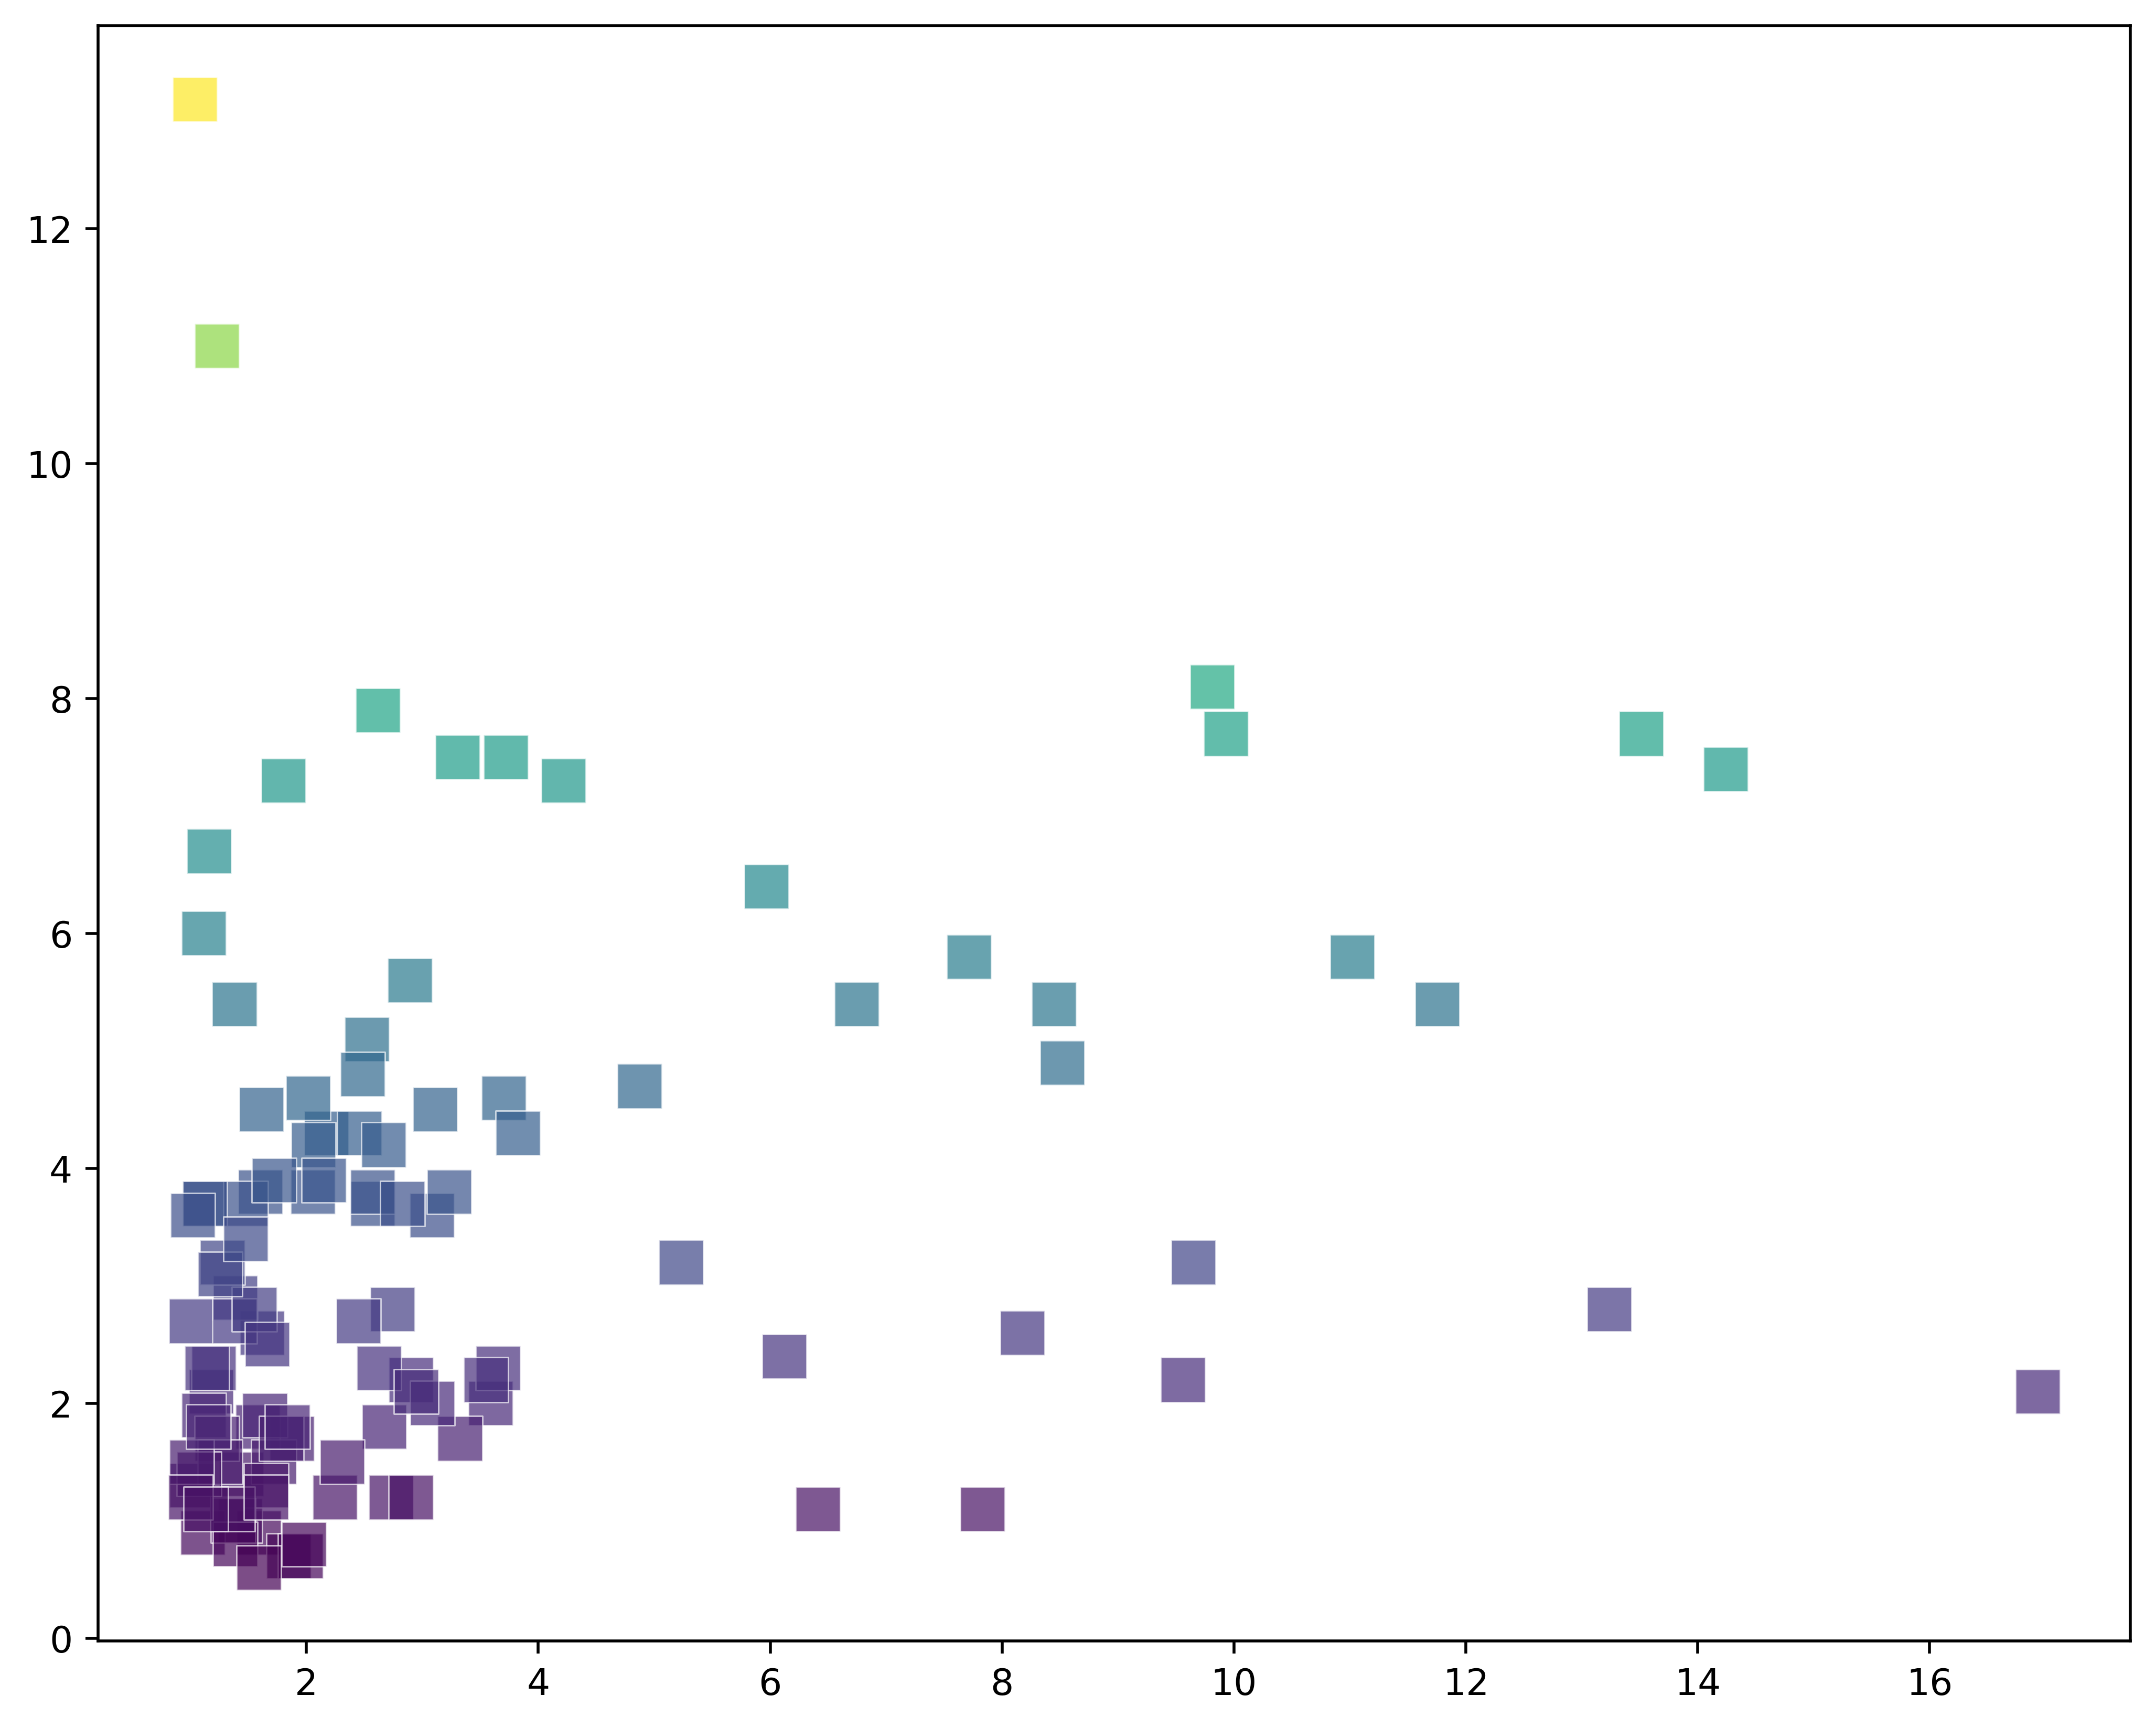

In [9]:
# parameters
x_col = 'biocapacity'
y_col = 'footprint'
c = 'earthsRequired'

fig, ax = plt.subplots(figsize=(10, 8), dpi=500)

ax.scatter(
   df[x_col],
   df[y_col],
   c=df[c],
   s=150,
   edgecolor='white',
   alpha=0.7,
   marker='s',
   linewidth=0.4
)

plt.show()

## Custom colors

We first want to create a `cmap` that will be used with the `earthsRequired` column. This column will be used to **color the points** of the [scatter plot](/scatter-plot). Thanks to its `LinearSegmentedColormap` class, the `matplotlib.colors` module allows us to **create a custom colormap**. We can then use it with the `scatter()` function by setting the `c` argument to the column we want to use for the colors.


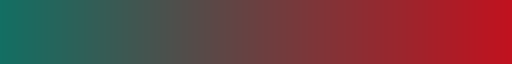

In [11]:
def create_gradient_colormap(colors):
   cmap = LinearSegmentedColormap.from_list("custom_gradient", colors, N=256)
   return cmap

colors = ['#136f63', '#c1121f']
cmap = create_gradient_colormap(colors)
cmap

Once we have our colormap, we define other colors that will be used for the **annotations** and the **spines** of the plot.


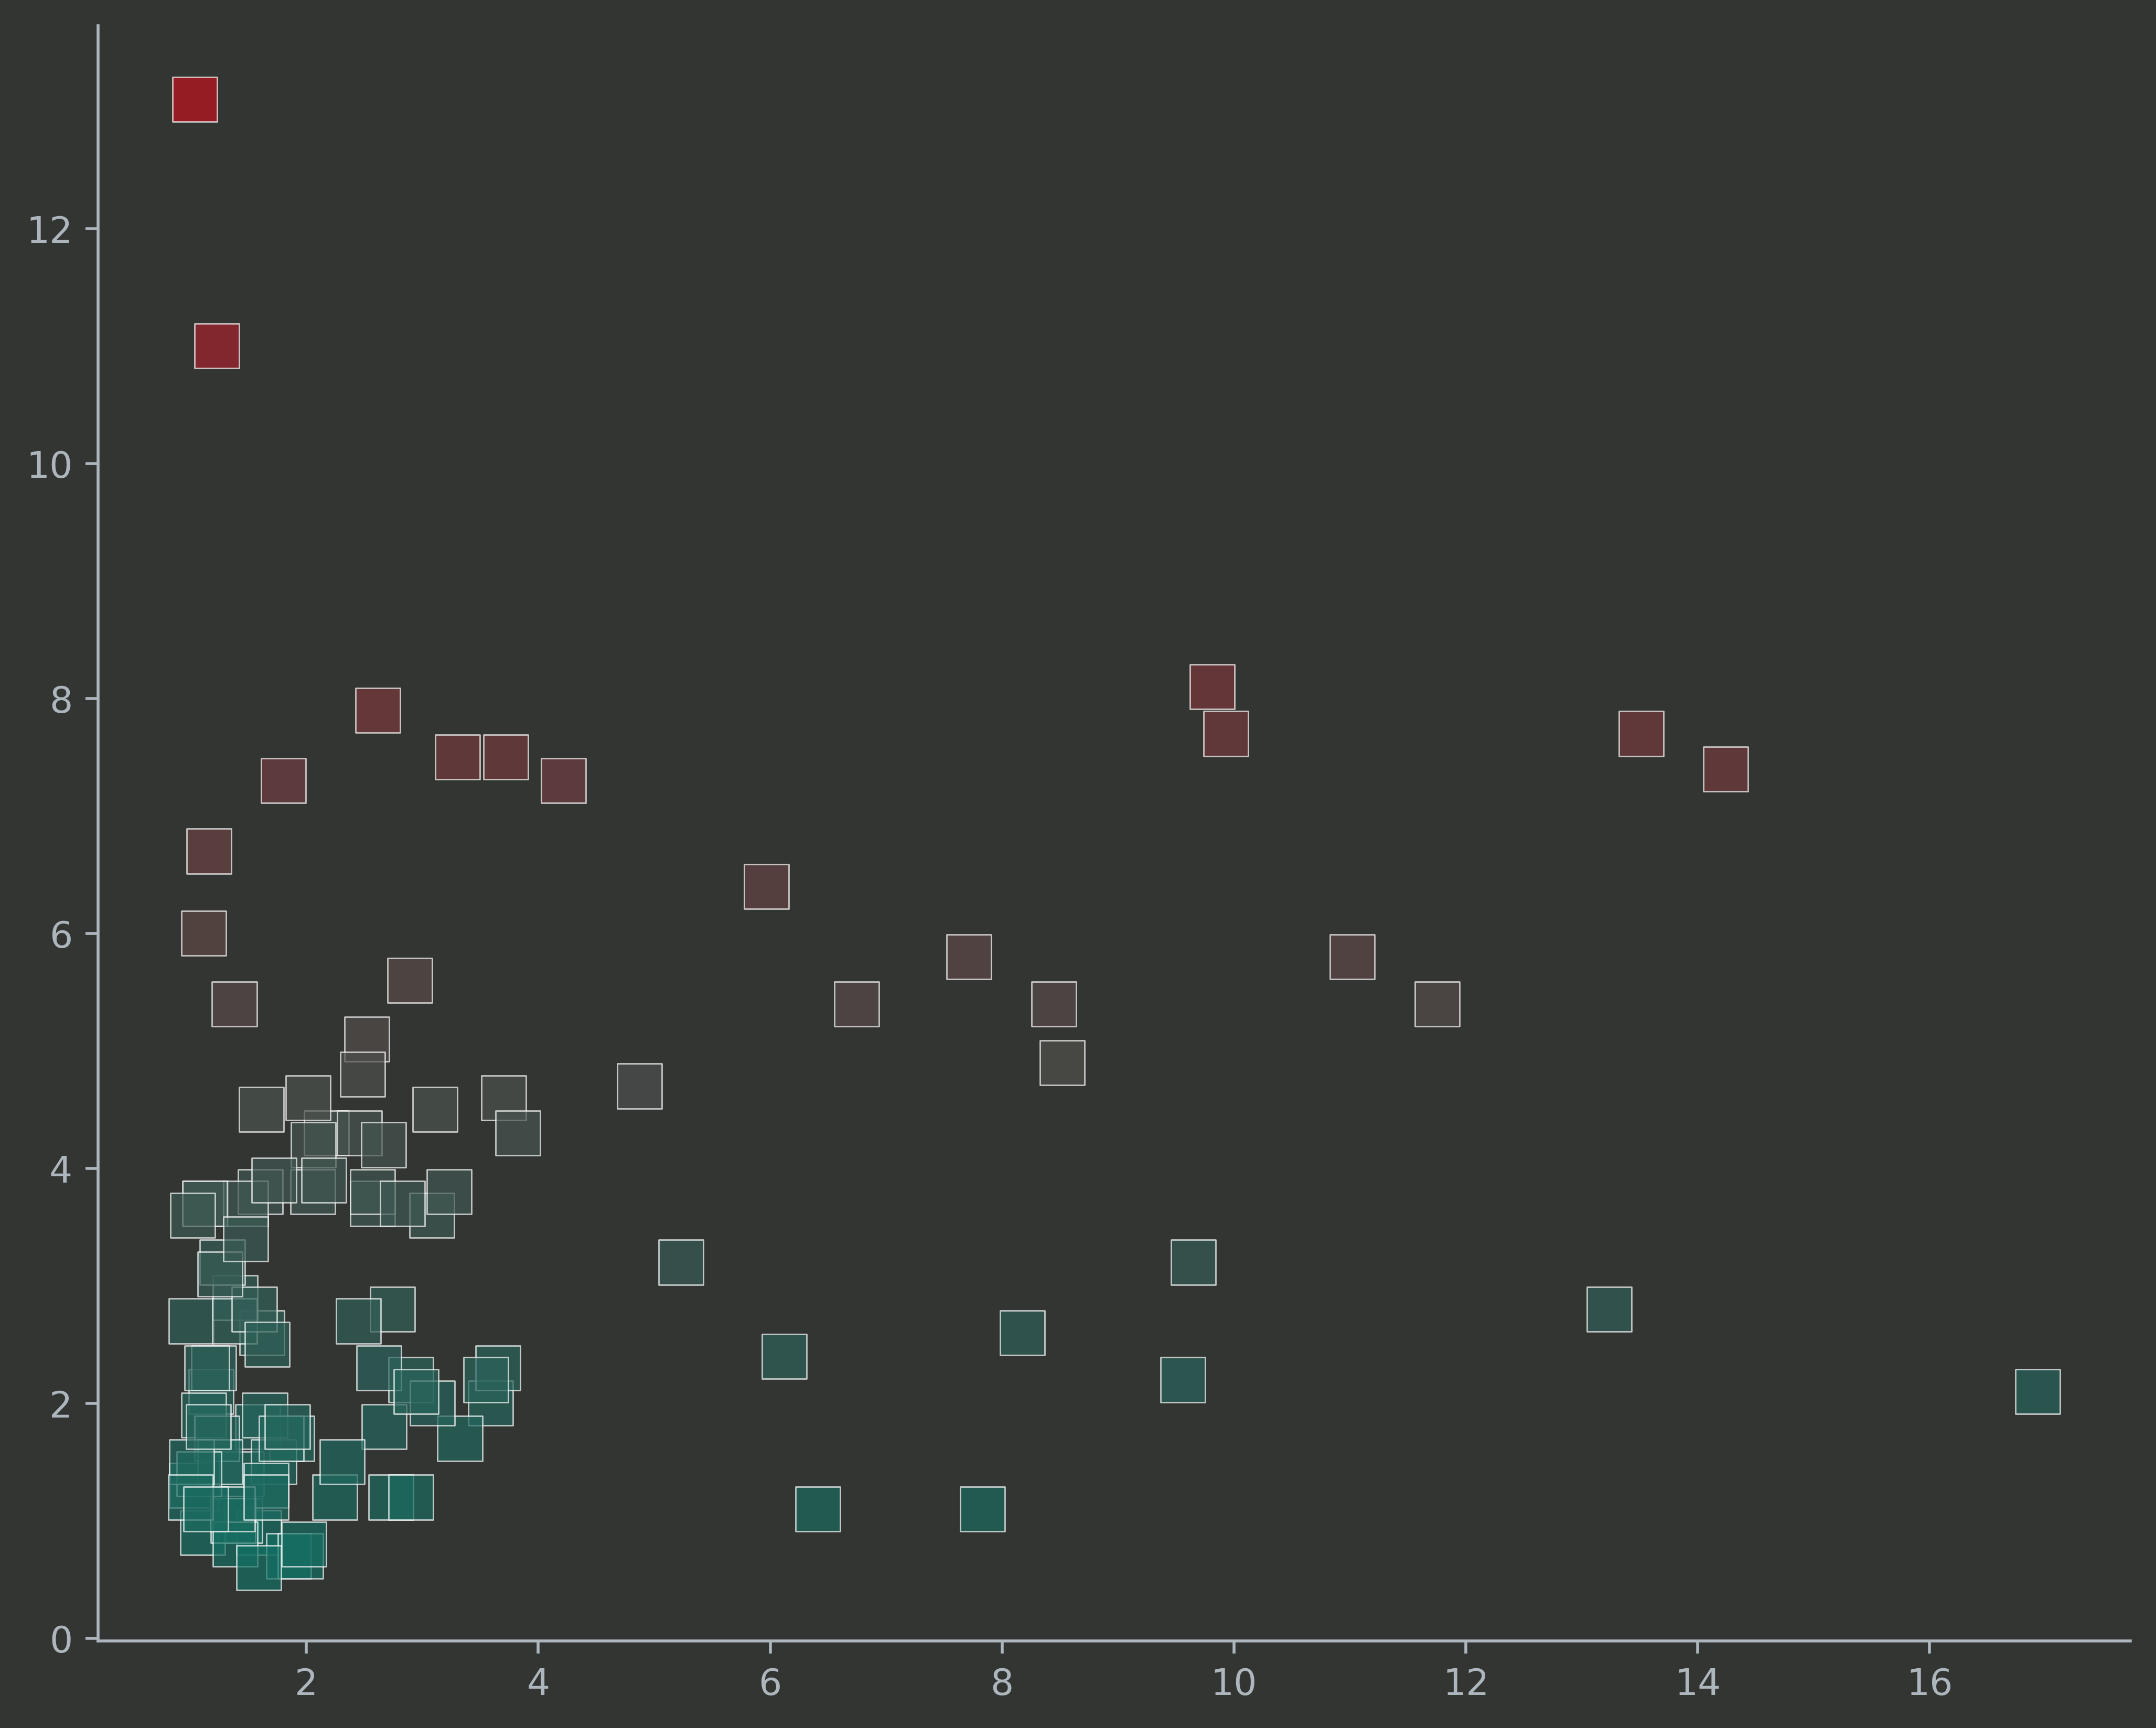

In [12]:
# parameters
background_color = '#333533'
text_color = 'white'
light_text_color = '#adb5bd'
x_col = 'biocapacity'
y_col = 'footprint'
c = 'earthsRequired'

fig, ax = plt.subplots(figsize=(10, 8), dpi=500)
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)
ax.spines[['top', 'right']].set_visible(False)
ax.spines['bottom'].set_color(light_text_color)
ax.spines['left'].set_color(light_text_color)
ax.tick_params(axis='x', colors=light_text_color)
ax.tick_params(axis='y', colors=light_text_color)

ax.scatter(
   df[x_col],
   df[y_col],
   c=df[c],
   s=150,
   cmap=cmap,
   edgecolor='white',
   alpha=0.7,
   marker='s',
   linewidth=0.4
)

plt.show()

## Title and labels

Now that we have the main components of the plot, we can add simple annotations. This mainly relies on the `fig_text()` from the `highlight_text` package. You can [learn more about it](/advanced-custom-annotations-matplotlib) in the gallery.


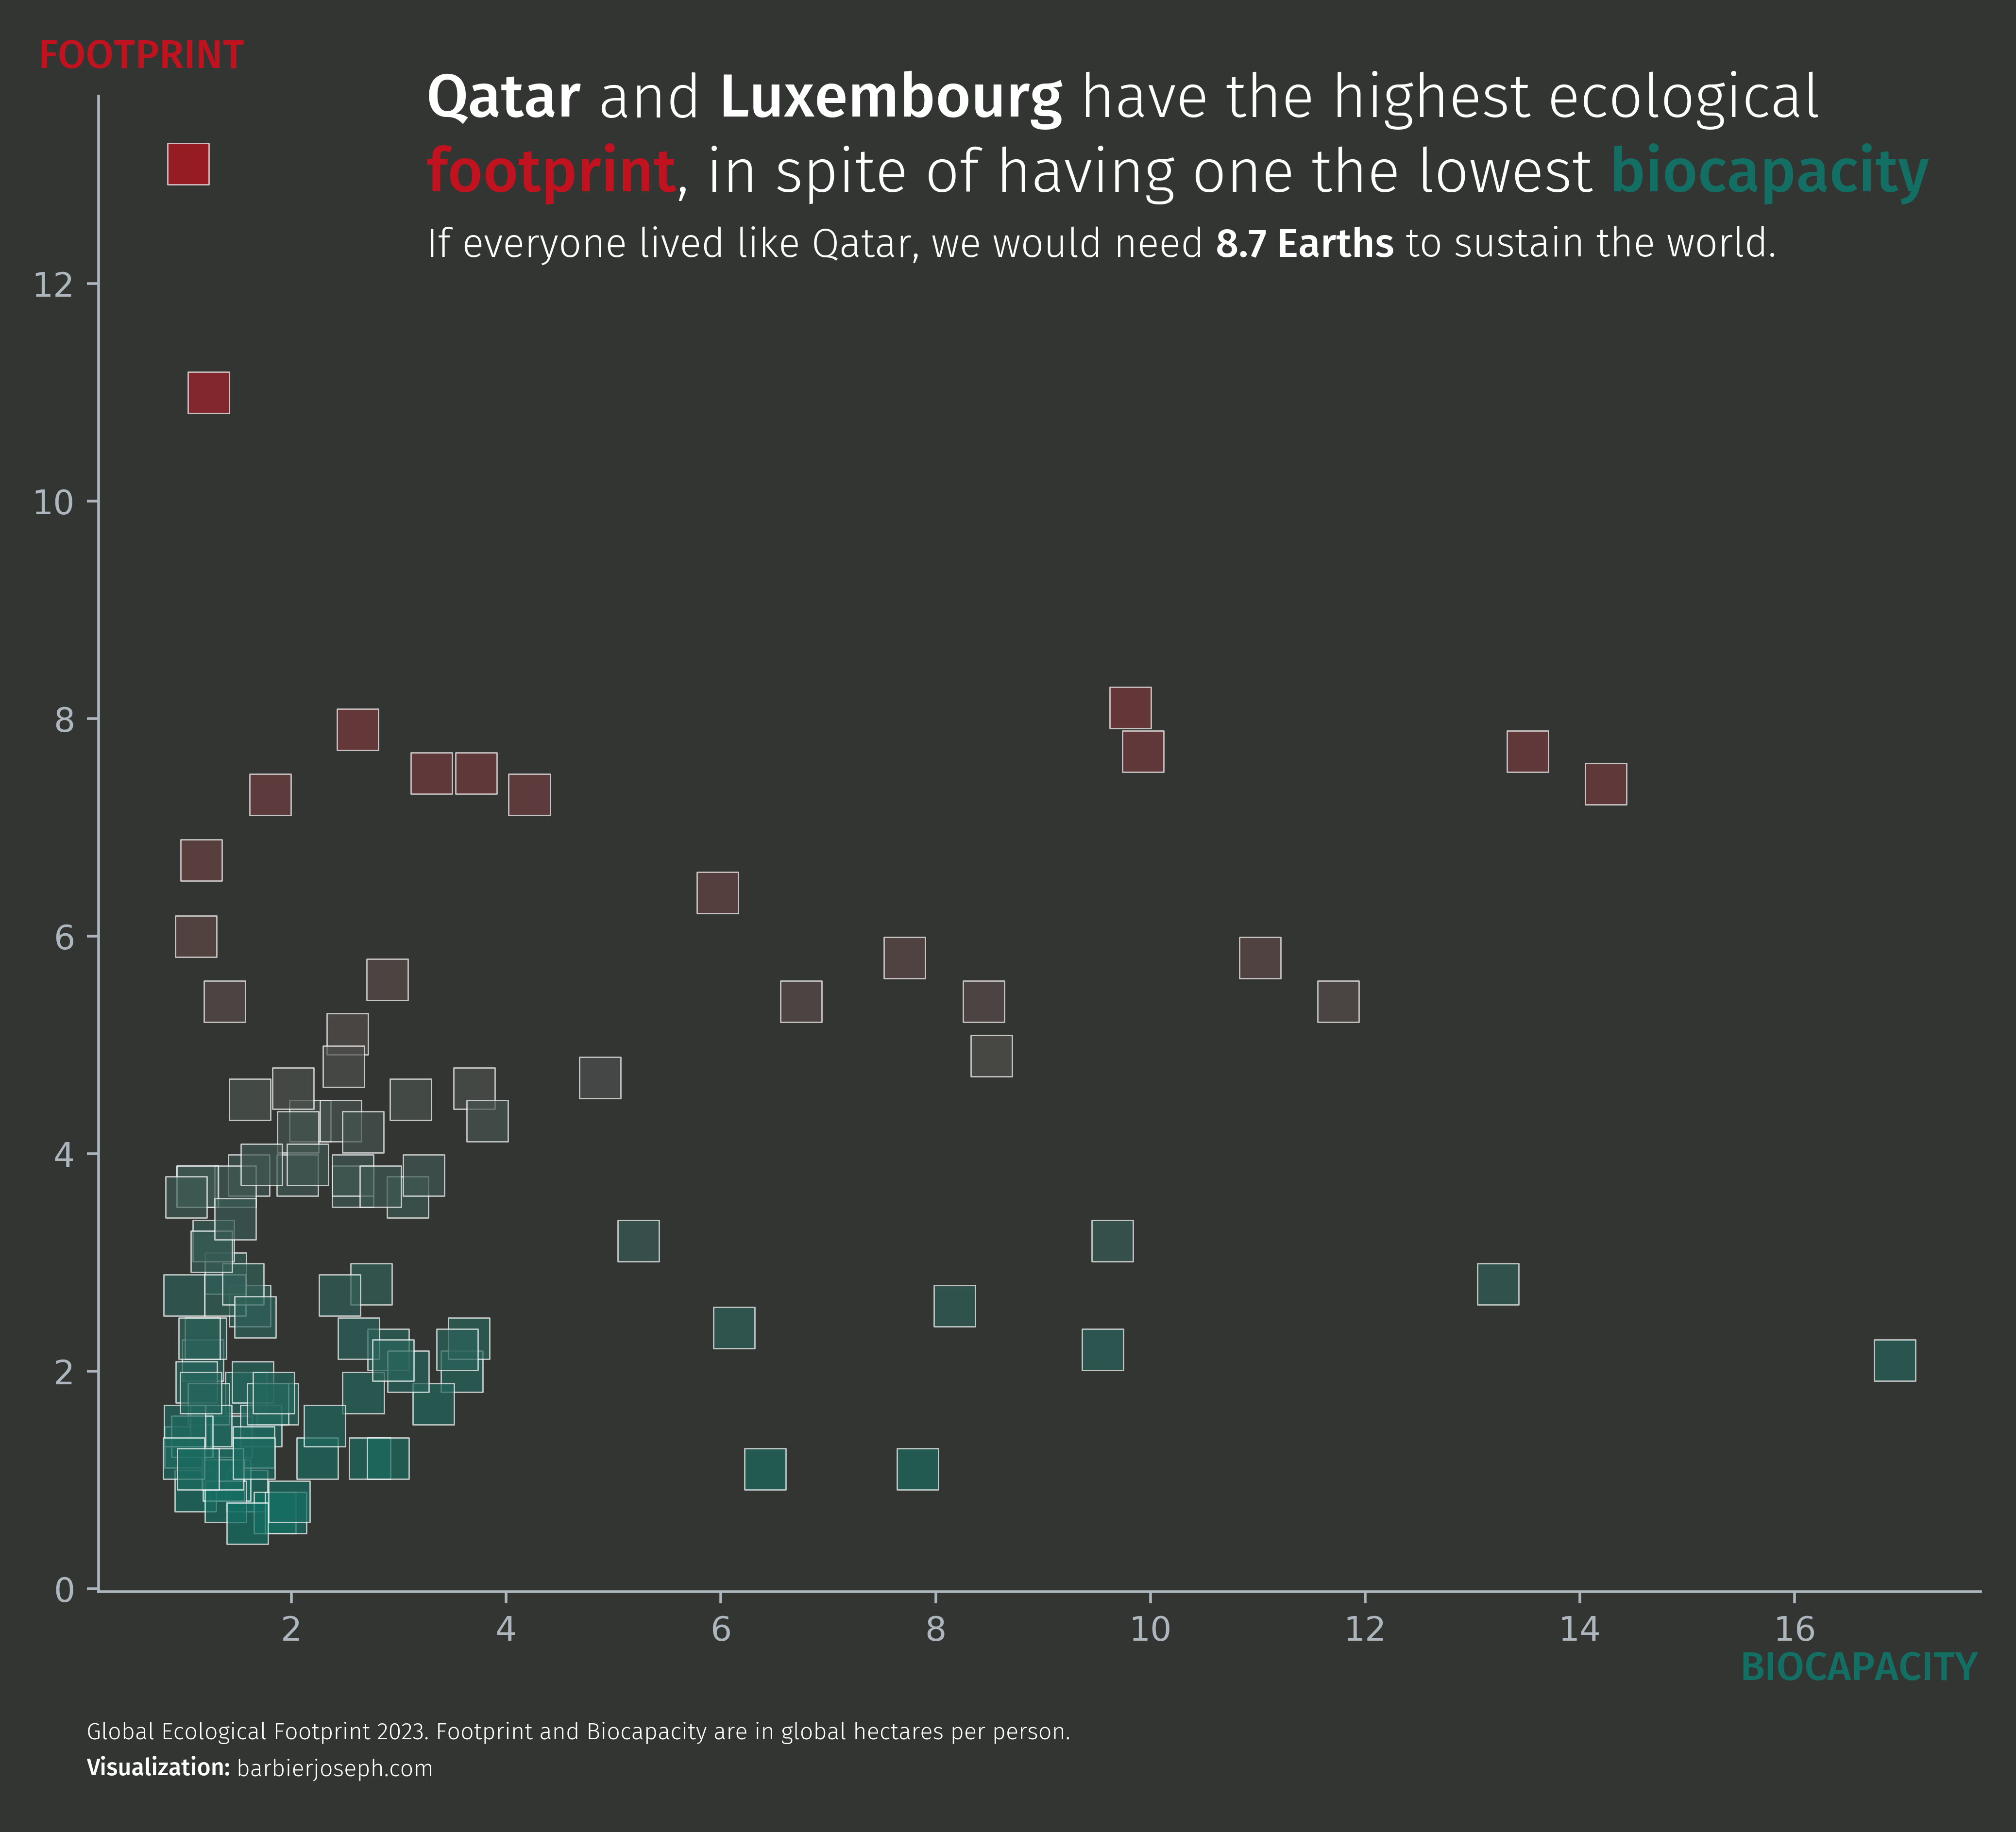

In [6]:
def create_gradient_colormap(colors):
   cmap = LinearSegmentedColormap.from_list("custom_gradient", colors, N=256)
   return cmap

# font
personal_path = '/Users/josephbarbier/Library/Fonts/'
font_path = personal_path + 'FiraSans-Light.ttf'
font = FontProperties(fname=font_path)
bold_font = FontProperties(fname=personal_path + 'FiraSans-Medium.ttf')

# parameters
colors = ['#136f63', '#c1121f']
cmap = create_gradient_colormap(colors)
background_color = '#333533'
text_color = 'white'
light_text_color = '#adb5bd'
x_col = 'biocapacity'
y_col = 'footprint'
c = 'earthsRequired'

fig, ax = plt.subplots(figsize=(10, 8), dpi=500)
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)
ax.spines[['top', 'right']].set_visible(False)
ax.spines['bottom'].set_color(light_text_color)
ax.spines['left'].set_color(light_text_color)
ax.tick_params(axis='x', colors=light_text_color)
ax.tick_params(axis='y', colors=light_text_color)

ax.scatter(
   df[x_col],
   df[y_col],
   c=df[c],
   s=150,
   cmap=cmap,
   edgecolor='white',
   alpha=0.7,
   marker='s',
   linewidth=0.4
)

# title
qatar_color = cmap(df.loc[df['country'] == 'Qatar', c].values[0]/df[c].max())
luxembourg_color = cmap(df.loc[df['country'] == 'Luxembourg', c].values[0]/df[c].max())
qatar_earths = df.loc[df['country'] == 'Qatar', 'earthsRequired'].values[0]
luxembourg_earths = df.loc[df['country'] == 'Luxembourg', 'earthsRequired'].values[0]
text = f"""
<Qatar> and <Luxembourg> have the highest ecological\n<footprint>, in spite of having one the lowest <biocapacity>
"""
fig_text(
   0.26,
   0.9,
   text,
   fontsize=18,
   color=text_color,
   font=font,
   ha='left',
   va='top',
   highlight_textprops=[
      {'font':bold_font},
      {'font':bold_font},
      {'font':bold_font, 'color':colors[1]},
      {'font':bold_font, 'color':colors[0]}
   ],
   ax=ax
)
text = f"""
If everyone lived like Qatar, we would need <{qatar_earths:.1f} Earths> to sustain the world.
"""
fig_text(
   0.26,
   0.82,
   text,
   fontsize=12,
   color=text_color,
   font=font,
   ha='left',
   va='top',
   highlight_textprops=[
      {'font':bold_font}
   ],
   ax=ax
)

# credit and about
text = """
Global Ecological Footprint 2023. Footprint and Biocapacity are in global hectares per person.
<Visualization:> barbierjoseph.com
"""
fig_text(
   0.12,
   0.05,
   text,
   fontsize=7,
   font=font,
   color=text_color,
   ha='left',
   va='top',
   highlight_textprops=[
      {'font':bold_font}
   ],
   ax=ax
)

# label for axis
fig_text(
   0.85, 0.08,
   'Biocapacity'.upper(),
   fontsize=12,
   font=bold_font,
   color=colors[0],
   ha='center',
   va='top',
   ax=ax
)
fig_text(
   0.1, 0.9,
   'Footprint'.upper(),
   fontsize=12,
   font=bold_font,
   color=colors[1],
   ha='left',
   va='center',
   ax=ax
)

plt.show()

## Highlight specific countries

Now, in order to add a bit of **storytelling** to the plot, we can highlight specific countries. This is done by adding a **label** next to the point of interest.

- We start by defining a **list of countries** that we want to highlight. We then **loop over this list** and add an annotation to the plot for each country.

- The `ax.text()` function is used to add the annotation. We can specify the position of the annotation with the `x`and `y` arguments and the text with the `text` argument.

- Then, thanks to the `box` argument, we can add a **box around the annotation**. For example:

`bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2)` will create a grey box with a 0.2 transparency around the annotation.


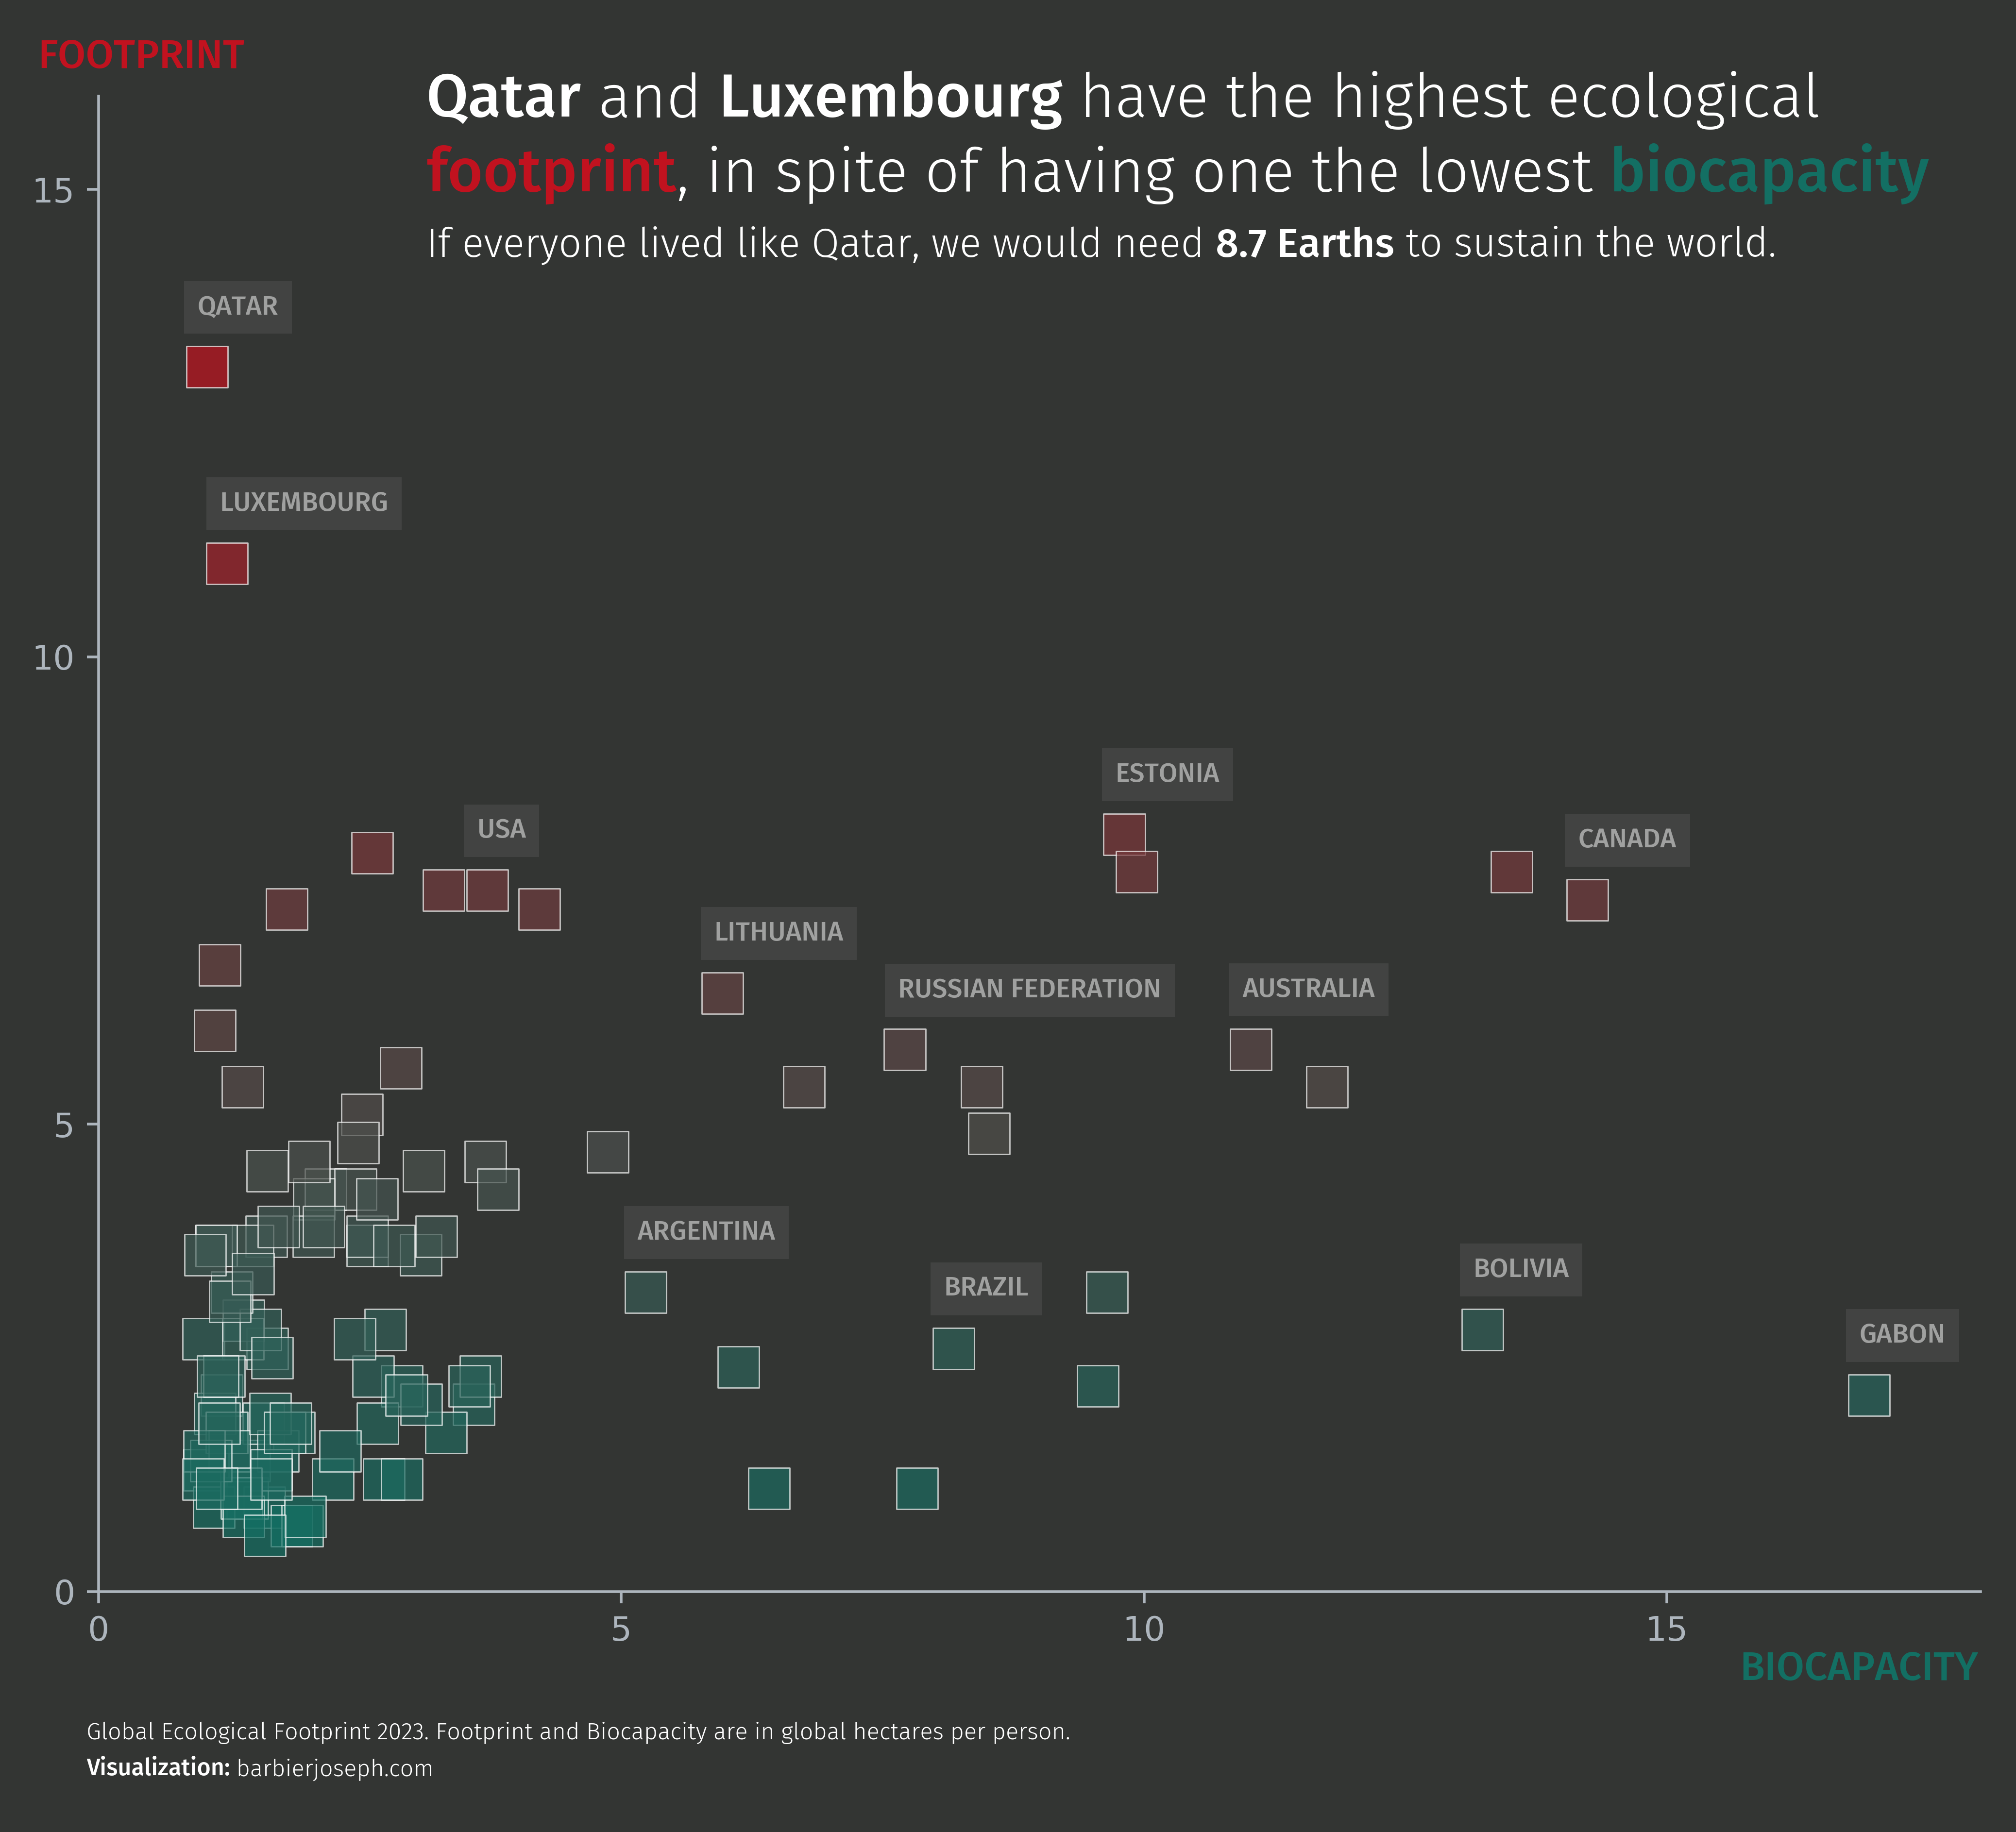

In [8]:
def create_gradient_colormap(colors):
   cmap = LinearSegmentedColormap.from_list("custom_gradient", colors, N=256)
   return cmap

# parameters
colors = ['#136f63', '#db3a34']
colors = ['#136f63', '#c1121f']
cmap = create_gradient_colormap(colors)
background_color = '#333533'
text_color = 'white'
light_text_color = '#adb5bd'
countries_to_annote = [
   'Australia', 'Bolivia', 'Canada',
   'Gabon', 'Brazil', 'Argentina',
   'Estonia', 'Luxembourg', 'Qatar',
   'United States of America',
   'Lithuania', 'Russian Federation',
]
x_col = 'biocapacity'
y_col = 'footprint'
c = 'earthsRequired'

# font
personal_path = '/Users/josephbarbier/Library/Fonts/'
font_path = personal_path + 'FiraSans-Light.ttf'
font = FontProperties(fname=font_path)
bold_font = FontProperties(fname=personal_path + 'FiraSans-Medium.ttf')

fig, ax = plt.subplots(figsize=(10, 8), dpi=500)
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)
ax.spines[['top', 'right']].set_visible(False)
ax.spines['bottom'].set_color(light_text_color)
ax.spines['left'].set_color(light_text_color)
ax.tick_params(axis='x', colors=light_text_color)
ax.tick_params(axis='y', colors=light_text_color)
ax.set_xticks([0, 5, 10, 15])
ax.set_yticks([0, 5, 10, 15])
ax.set_xlim(0, 18)
ax.set_ylim(0, 16)

scatter = ax.scatter(
   df[x_col],
   df[y_col],
   c=df[c],
   s=150,
   cmap=cmap,
   edgecolor='white',
   alpha=0.7,
   marker='s',
   linewidth=0.4
)

labels = []
for country in countries_to_annote:
   x = df.loc[df['country'] == country, x_col].values[0]
   y = df.loc[df['country'] == country, y_col].values[0]
   color = text_color
   if country == 'United States of America':
      country = 'USA'
   text = ax.text(
      x-0.11,
      y+0.8,
      country.upper(),
      fontsize=8,
      font=bold_font,
      color=color,
      alpha=0.5,
      ha='left',
      va='top',
      zorder=10,
      bbox=dict(facecolor='grey', edgecolor='none', alpha=0.2)
   )
   labels.append(text)

adjust_text(
   labels,
   ax=ax
)

# title
qatar_color = cmap(df.loc[df['country'] == 'Qatar', c].values[0]/df[c].max())
luxembourg_color = cmap(df.loc[df['country'] == 'Luxembourg', c].values[0]/df[c].max())
qatar_earths = df.loc[df['country'] == 'Qatar', 'earthsRequired'].values[0]
luxembourg_earths = df.loc[df['country'] == 'Luxembourg', 'earthsRequired'].values[0]
text = f"""
<Qatar> and <Luxembourg> have the highest ecological\n<footprint>, in spite of having one the lowest <biocapacity>
"""
fig_text(
   0.26,
   0.9,
   text,
   fontsize=18,
   color=text_color,
   font=font,
   ha='left',
   va='top',
   highlight_textprops=[
      {'font':bold_font},
      {'font':bold_font},
      {'font':bold_font, 'color':colors[1]},
      {'font':bold_font, 'color':colors[0]}
   ],
   ax=ax
)
text = f"""
If everyone lived like Qatar, we would need <{qatar_earths:.1f} Earths> to sustain the world.
"""
fig_text(
   0.26,
   0.82,
   text,
   fontsize=12,
   color=text_color,
   font=font,
   ha='left',
   va='top',
   highlight_textprops=[
      {'font':bold_font}
   ],
   ax=ax
)

# credit and about
text = """
Global Ecological Footprint 2023. Footprint and Biocapacity are in global hectares per person.
<Visualization:> barbierjoseph.com
"""
fig_text(
   0.12,
   0.05,
   text,
   fontsize=7,
   font=font,
   color=text_color,
   ha='left',
   va='top',
   highlight_textprops=[
      {'font':bold_font}
   ],
   ax=ax
)

# label for axis
fig_text(
   0.85, 0.08,
   'Biocapacity'.upper(),
   fontsize=12,
   font=bold_font,
   color=colors[0],
   ha='center',
   va='top',
   ax=ax
)
fig_text(
   0.1, 0.9,
   'Footprint'.upper(),
   fontsize=12,
   font=bold_font,
   color=colors[1],
   ha='left',
   va='center',
   ax=ax
)

plt.savefig('../../static/graph/web-scatter-with-customized-annotations.png', bbox_inches='tight', dpi=500)
plt.show()

## Going further

You might be interested in:

- creating a [bubble plot](/web-bubble-plot-with-annotations-and-custom-features) with specific highlight and difference marker size
- a scatter plot where [dots are images](/web-scatterplot-with-images-in-circles)
- adding a [regression line](/556-visualize-linear-regression) to the scatter plot
